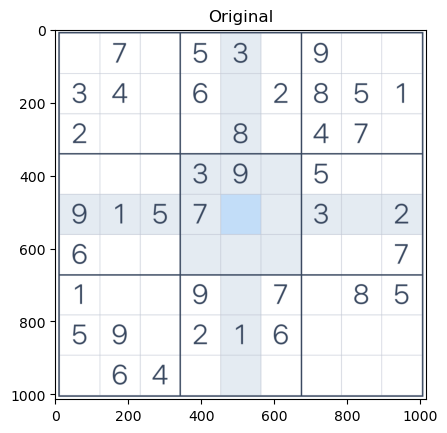

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudokuTest.png', cv2.IMREAD_COLOR)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

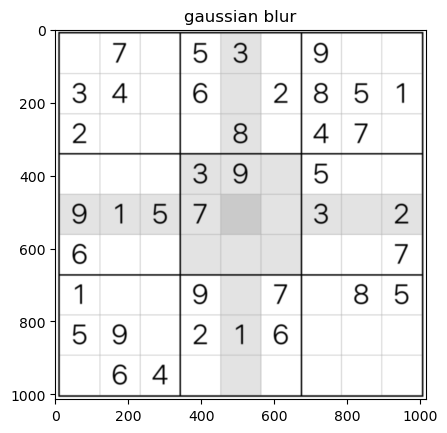

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.title('gaussian blur')
plt.imshow(blurred, cmap='gray')
plt.show()

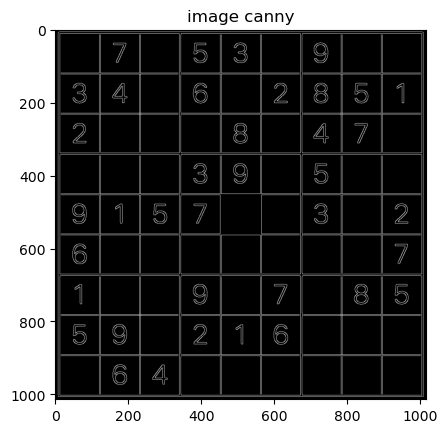

In [13]:
imgCanny=cv2.Canny(blurred,50,50)
plt.title('image canny')
plt.imshow(imgCanny, cmap='gray')
plt.show()


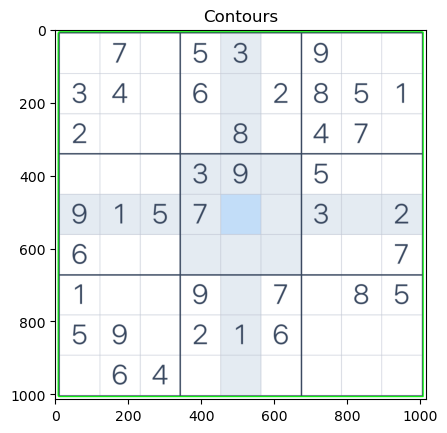

In [14]:
contours, hierarchy = cv2.findContours(
    imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.title('Contours')
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.show()